#Telecom-Network-Call-Drop-Analysis

Telecom Network Call Drop Analysis is an EDA-based Python project that analyzes telecom call drop behavior to assess network quality. It evaluates the impact of traffic, weather, time slots, and cell sites using statistical summaries and visualizations.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

# -------------------------------
# Create output folder
# -------------------------------

In [ ]:
os.makedirs("outputs", exist_ok=True)

# -------------------------------
# 1. Load Dataset
# -------------------------------

In [ ]:
df = pd.read_csv(r"Telco.csv")

print("\n========== DATASET LOADED ==========")
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])
print("\nColumns:")
print(df.columns.tolist())
print("\n========== SAMPLE DATA ==========")
print(df.head())



========== DATASET LOADED ==========
Total Rows: 6156
Total Columns: 9

Columns:
['outgoing_site_id', 'Start_Time_MM_DD_YYYY', 'Start_Time_HH_MM_SS_s', 'Weather', 'Total Calls', 'Traffic', 'lat', 'long', 'Call_Dropped']

========== SAMPLE DATA ==========
   outgoing_site_id  Start_Time_MM_DD_YYYY Start_Time_HH_MM_SS_s      Weather  \
0              1717               20170101         00:00 to 4:00        Smoke   
1              1717               20170101          4:00 to 8:00  Shallow Fog   
2              1717               20170101         8:00 to 12:00  Shallow Fog   
3              1717               20170101        12:00 to 16:00          Fog   
4              1717               20170101        16:00 to 20:00          Fog   

   Total Calls Traffic        lat       long  Call_Dropped  
0          499     Low  40.710567 -74.007338            16  
1          554  Medium  40.710567 -74.007338            44  
2          301     Low  40.710567 -74.007338            17  
3          51

# -------------------------------
# 2. Feature Engineering
# -------------------------------

In [ ]:
df["Call_Drop_Rate"] = (df["Call_Dropped"] / df["Total Calls"]) * 100

print("\n========== SAMPLE DATA ==========")
print(df.head())
print("\n========== FEATURE ENGINEERING COMPLETED ==========")


========== SAMPLE DATA ==========
   outgoing_site_id  Start_Time_MM_DD_YYYY Start_Time_HH_MM_SS_s      Weather  \
0              1717               20170101         00:00 to 4:00        Smoke   
1              1717               20170101          4:00 to 8:00  Shallow Fog   
2              1717               20170101         8:00 to 12:00  Shallow Fog   
3              1717               20170101        12:00 to 16:00          Fog   
4              1717               20170101        16:00 to 20:00          Fog   

   Total Calls Traffic        lat       long  Call_Dropped  Call_Drop_Rate  
0          499     Low  40.710567 -74.007338            16        3.206413  
1          554  Medium  40.710567 -74.007338            44        7.942238  
2          301     Low  40.710567 -74.007338            17        5.647841  
3          514     Low  40.710567 -74.007338            16        3.112840  
4          262     Low  40.710567 -74.007338            14        5.343511  

========== FEAT

# -------------------------------
# 3. Overall Call Drop Rate
# -------------------------------

In [ ]:
overall_drop_rate = (df["Call_Dropped"].sum() / df["Total Calls"].sum()) * 100
print("\nOverall Call Drop Rate:", round(overall_drop_rate, 2), "%")


Overall Call Drop Rate: 8.68 %


# -------------------------------
# 4. Traffic-wise Analysis
# -------------------------------


Traffic-wise Average Call Drop Rate:
Traffic
High      14.039199
Low        4.629407
Medium     9.616320
Name: Call_Drop_Rate, dtype: float64


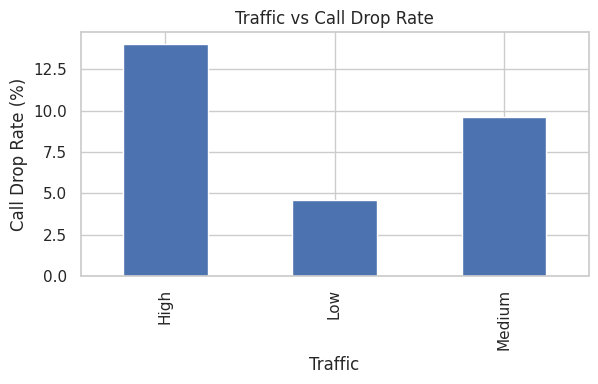

In [ ]:
traffic_avg = df.groupby("Traffic")["Call_Drop_Rate"].mean()
print("\nTraffic-wise Average Call Drop Rate:")
print(traffic_avg)

plt.figure(figsize=(6,4))
traffic_avg.plot(kind="bar")
plt.title("Traffic vs Call Drop Rate")
plt.ylabel("Call Drop Rate (%)")
plt.tight_layout()
plt.savefig("outputs/traffic_vs_call_drop.png")
plt.show()
plt.close()
plt.clf()
plt.cla()
plt.close("all")


# -------------------------------
# 5. Weather-wise Analysis
# -------------------------------


Weather-wise Average Call Drop Rate:
Weather
Partly Cloudy                   11.001763
Drizzle                         10.470827
Clear                           10.135586
Fog                              9.952533
Light Rain                       9.413273
Shallow Fog                      9.161496
Smoke                            9.158275
Mostly Cloudy                    9.076788
Light Thunderstorms and Rain     8.816243
Haze                             8.506778
Rain                             8.413937
Light Drizzle                    8.326945
Volcanic Ash                     8.239935
Scattered Clouds                 7.474670
Name: Call_Drop_Rate, dtype: float64


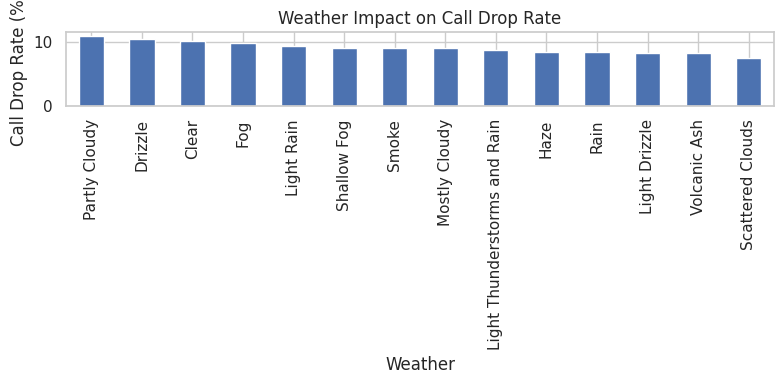

In [ ]:
weather_avg = df.groupby("Weather")["Call_Drop_Rate"].mean().sort_values(ascending=False)
print("\nWeather-wise Average Call Drop Rate:")
print(weather_avg)

plt.figure(figsize=(8,4))
weather_avg.plot(kind="bar")
plt.title("Weather Impact on Call Drop Rate")
plt.ylabel("Call Drop Rate (%)")
plt.tight_layout()
plt.savefig("outputs/weather_vs_call_drop.png")
plt.show()



# -------------------------------
# 6. Distribution (Histogram)
# -------------------------------


Call Drop Rate Statistics:
count    6156.000000
mean        9.387547
std         4.772811
min         2.034429
25%         5.590062
50%         8.666904
75%        12.109375
max        25.213675
Name: Call_Drop_Rate, dtype: float64


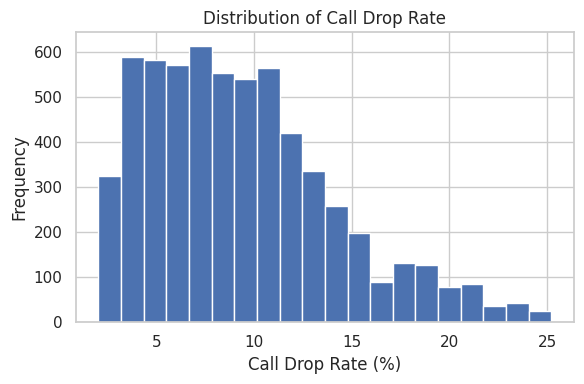

In [ ]:
print("\nCall Drop Rate Statistics:")
print(df["Call_Drop_Rate"].describe())

plt.figure(figsize=(6,4))
plt.hist(df["Call_Drop_Rate"], bins=20)
plt.title("Distribution of Call Drop Rate")
plt.xlabel("Call Drop Rate (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("outputs/call_drop_distribution.png")
plt.show()
plt.Colorizer()
plt.close()
plt.clf()
plt.cla()
plt.close("all")


# -------------------------------
# 7. Traffic vs Call Drop (Boxplot)
# -------------------------------

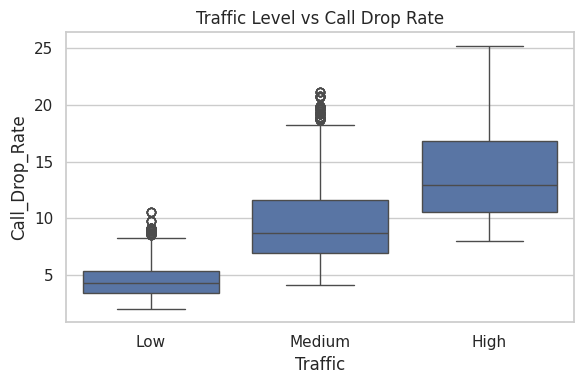

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Traffic", y="Call_Drop_Rate", data=df)
plt.title("Traffic Level vs Call Drop Rate")
plt.tight_layout()
plt.savefig("outputs/traffic_boxplot.png")
plt.show()
plt.close()
plt.clf()
plt.cla()
plt.close("all")


# -------------------------------
# 8. Correlation Heatmap
# -------------------------------


Correlation Matrix:
                Total Calls  Call_Dropped  Call_Drop_Rate
Total Calls        1.000000      0.009322       -0.554794
Call_Dropped       0.009322      1.000000        0.778373
Call_Drop_Rate    -0.554794      0.778373        1.000000


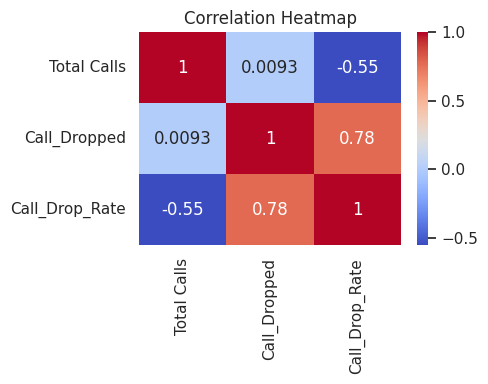

In [ ]:
corr = df[["Total Calls", "Call_Dropped", "Call_Drop_Rate"]].corr()
print("\nCorrelation Matrix:")
print(corr)

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("outputs/correlation_heatmap.png")
plt.show()
plt.close()
plt.clf()
plt.cla()
plt.close("all")


# -------------------------------
# 9. Time Slot Analysis
# -------------------------------


Time Slot-wise Call Drop Rate:
Start_Time_HH_MM_SS_s
00:00 to 4:00     9.094318
12:00 to 16:00    9.808328
16:00 to 20:00    9.745479
20:00 to 23:59    9.478050
4:00 to 8:00      8.770069
8:00 to 12:00     9.434392
Name: Call_Drop_Rate, dtype: float64


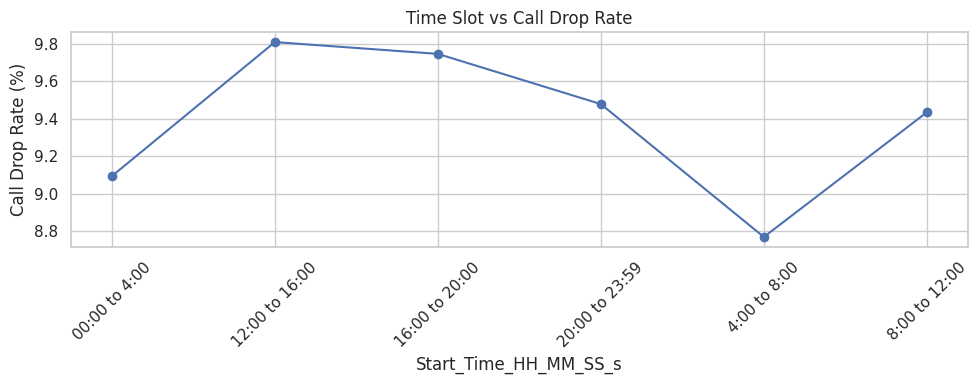

In [ ]:
time_avg = df.groupby("Start_Time_HH_MM_SS_s")["Call_Drop_Rate"].mean()
print("\nTime Slot-wise Call Drop Rate:")
print(time_avg)

plt.figure(figsize=(10,4))
time_avg.plot(marker="o")
plt.title("Time Slot vs Call Drop Rate")
plt.ylabel("Call Drop Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/time_slot_analysis.png")
plt.show()
plt.close()
plt.clf()
plt.cla()
plt.close("all")


# -------------------------------
# 10. Top 10 Worst Sites
# -------------------------------


Top 10 Sites with Highest Call Drop Rate:
outgoing_site_id
30178    9.663689
63383    9.456877
57151    9.442231
21106    9.394258
3066     9.253326
1717     9.114903
Name: Call_Drop_Rate, dtype: float64


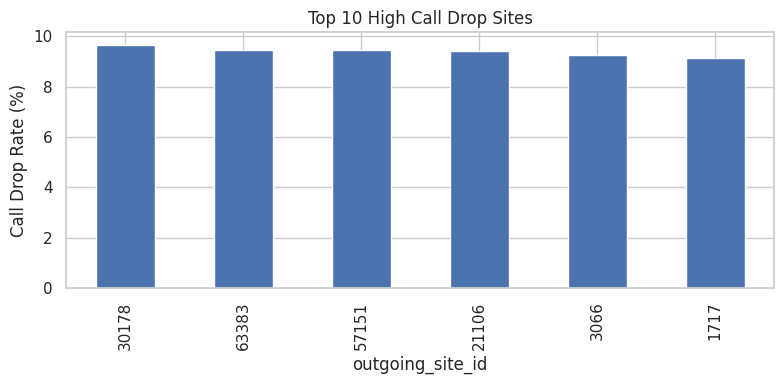

In [ ]:
site_avg = df.groupby("outgoing_site_id")["Call_Drop_Rate"].mean().sort_values(ascending=False)
print("\nTop 10 Sites with Highest Call Drop Rate:")
print(site_avg.head(10))

plt.figure(figsize=(8,4))
site_avg.head(10).plot(kind="bar")
plt.title("Top 10 High Call Drop Sites")
plt.ylabel("Call Drop Rate (%)")
plt.tight_layout()
plt.savefig("outputs/top_10_sites.png")
plt.show()
plt.close()
plt.clf()
plt.cla()
plt.close("all")


# -------------------------------
# 11. Final Conclusion
# -------------------------------

In [ ]:
print("\n========== CONCLUSION ==========")
print("1. Call drop rate increases during high traffic.")
print("2. Weather conditions significantly affect network quality.")
print("3. Certain time slots and sites need optimization.")
print("4. Visual EDA helps identify problem areas clearly.")



========== CONCLUSION ==========
1. Call drop rate increases during high traffic.
2. Weather conditions significantly affect network quality.
3. Certain time slots and sites need optimization.
4. Visual EDA helps identify problem areas clearly.
